In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/facial-keypoints-detection/test.zip
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/training.zip


In [2]:
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
cd /../kaggle/input

/kaggle/input


In [4]:
cd facial-keypoints-detection

/kaggle/input/facial-keypoints-detection


In [5]:
df=pd.read_csv("IdLookupTable.csv")
sub=pd.read_csv("SampleSubmission.csv")

In [6]:
sub

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27119,27120,0
27120,27121,0
27121,27122,0
27122,27123,0


In [7]:
df.head(31)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
5,6,1,left_eye_inner_corner_y,NaN
6,7,1,left_eye_outer_corner_x,NaN
7,8,1,left_eye_outer_corner_y,NaN
8,9,1,right_eye_inner_corner_x,NaN
9,10,1,right_eye_inner_corner_y,NaN


In [8]:
train.fillna(method='ffill', inplace=True)

NameError: name 'train' is not defined

In [9]:
train.isnull().sum()

NameError: name 'train' is not defined

In [10]:
df["FeatureName"].value_counts()

nose_tip_y                   1783
nose_tip_x                   1783
left_eye_center_y            1782
right_eye_center_x           1782
left_eye_center_x            1782
right_eye_center_y           1782
mouth_center_bottom_lip_y    1778
mouth_center_bottom_lip_x    1778
mouth_left_corner_x           590
mouth_center_top_lip_y        590
mouth_left_corner_y           590
mouth_center_top_lip_x        590
right_eye_inner_corner_y      589
left_eye_outer_corner_y       589
left_eye_outer_corner_x       589
right_eye_inner_corner_x      589
left_eye_inner_corner_y       588
right_eye_outer_corner_x      588
right_eye_outer_corner_y      588
left_eye_inner_corner_x       588
mouth_right_corner_y          587
mouth_right_corner_x          587
right_eyebrow_inner_end_x     585
left_eyebrow_inner_end_x      585
right_eyebrow_inner_end_y     585
left_eyebrow_inner_end_y      585
left_eyebrow_outer_end_x      574
left_eyebrow_outer_end_y      574
right_eyebrow_outer_end_y     572
right_eyebrow_

In [11]:
with zipfile.ZipFile('training.zip') as existing_zip:
    with existing_zip.open('training.csv') as traincsv:
        train=pd.read_csv(traincsv)

In [12]:
train

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [13]:
with zipfile.ZipFile('test.zip') as existing_zip:
    with existing_zip.open('test.csv') as testcsv:
        test=pd.read_csv(testcsv)

In [14]:
test

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [15]:
train[train.columns[0]].std()

3.448233248423428

In [16]:
train_x=np.empty((7049,96,96,1))
test_x=np.empty((1783,96,96,1))

In [17]:
for i in range(7049):
    trainn=train["Image"][i].split(" ")
    train1=[int(x) for x in trainn]
    train2=np.array(train1,dtype="float")
    train3=train2.reshape(96,96,1)
    
    train_x[i]=train3
        
        

In [18]:
for i in range(1783):
    testt=test["Image"][i].split(" ")
    test1=[int(x) for x in testt]
    test2=np.array(test1,dtype="float")
    test3=test2.reshape(96,96,1)
    
    test_x[i]=test3

TypeError: Invalid dimensions for image data

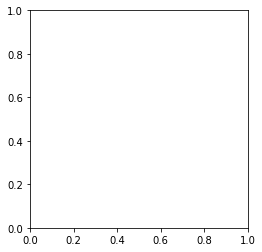

In [19]:
plt.imshow(train_x[0],cmap='gray')
plt.show()

TypeError: Invalid dimensions for image data

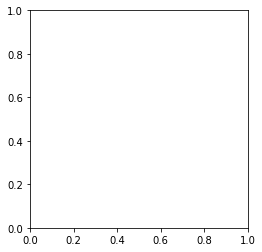

In [20]:
plt.imshow(test_x[0],cmap='gray')
plt.show()

In [21]:
train_x = train_x / 255
test_x = test_x /255

In [22]:
train_y=train.drop(['Image'],axis=1)


In [23]:
train_y

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447


In [24]:
mean=[]
std=[]

In [25]:
for columns in train_y.columns:
    mean.append(train_y[columns].mean())
    std.append(train_y[columns].std())
    train_y[columns] = (train_y[columns] - train_y[columns].mean()) / train_y[columns].std()

In [26]:
for column in train_y.columns:
    train_y[column].fillna(value=train_y[column].mean(),inplace = True)

In [27]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(3,3), activation = 'relu', input_shape=(96,96,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(12,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(30,activation='relu')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 12)        660       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5808)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2974208   
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1

In [28]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

In [29]:
model.fit(train_x,train_y,epochs = 10)

Train on 7049 samples
Epoch 1/10
7049/7049 [==============================] - 20s 3ms/sample - loss: 0.5015 - accuracy: 0.0776
Epoch 2/10
7049/7049 [==============================] - 19s 3ms/sample - loss: 0.5014 - accuracy: 0.0770
Epoch 3/10
7049/7049 [==============================] - 19s 3ms/sample - loss: 0.5014 - accuracy: 0.0770
Epoch 4/10
7049/7049 [==============================] - 19s 3ms/sample - loss: 0.5014 - accuracy: 0.0770
Epoch 5/10
7049/7049 [==============================] - 19s 3ms/sample - loss: 0.5014 - accuracy: 0.0770
Epoch 6/10
7049/7049 [==============================] - 19s 3ms/sample - loss: 0.5014 - accuracy: 0.0770
Epoch 7/10
7049/7049 [==============================] - 19s 3ms/sample - loss: 0.5014 - accuracy: 0.0770
Epoch 8/10
7049/7049 [==============================] - 19s 3ms/sample - loss: 0.5014 - accuracy: 0.0770
Epoch 9/10
7049/7049 [==============================] - 20s 3ms/sample - loss: 0.5014 - accuracy: 0.0770
Epoch 10/10
7049/7049 [==========

In [30]:
pred = model.predict(test_x)

In [31]:
pred.shape

(1783, 30)

In [32]:
lookid_list = list(df['FeatureName'])
imageID = list(df['ImageId']-1)
pre_list = list(pred)

In [33]:
rowid = df['RowId']
rowid=list(rowid)

In [34]:
feature = []
for f in list(df['FeatureName']):
    feature.append(lookid_list.index(f))

In [35]:
lookid_list

['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y',
 'left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 '

In [36]:
imageID

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,


In [37]:
feature

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 0,
 1,
 2,
 3,
 4,


In [38]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y] * std[y] + mean[y])

In [39]:
rowid = pd.Series(rowid,name = 'RowId')

In [40]:
loc = pd.Series(preded,name = 'Location')

In [41]:
submission = pd.concat([rowid,loc],axis = 1)

In [42]:
submission

,RowId,Location
0,1,66.359021
1,2,37.651234
2,3,30.306102
3,4,37.976943
4,5,59.159339
...,...,...
27119,27120,37.976943
27120,27121,48.374186
27121,27122,62.715884
27122,27123,48.569472


In [43]:
cd /../kaggle/working

/kaggle/working


In [44]:
submission.to_csv('submission.csv',index = False)

In [45]:
pwd

'/kaggle/working'